In [1]:
import pandas as pd
import numpy as np   
import matplotlib.pyplot as plt  
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
netflix = pd.read_csv("netflix_titles.csv")

In [3]:
netflix.shape

(8807, 12)

In [4]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
netflix.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [6]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
netflix.director.unique()

array(['Kirsten Johnson', nan, 'Julien Leclercq', ..., 'Majid Al Ansari',
       'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [8]:
netflix.duplicated().sum() 

0

In [9]:
netflix.isnull().sum() 

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
print("Percentage Of Missing Values")
Perc_Of_Missing_Values=netflix.isna().sum()/len(netflix)*100
Perc_Of_Missing_Values[Perc_Of_Missing_Values!=0]

Percentage Of Missing Values


director      29.908028
cast           9.367549
country        9.435676
date_added     0.113546
rating         0.045418
duration       0.034064
dtype: float64

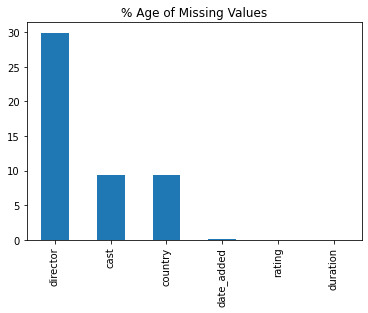

In [11]:
only_missing=Perc_Of_Missing_Values[Perc_Of_Missing_Values!=0]
only_missing.plot(kind="bar")
plt.title("% Age of Missing Values")
plt.show()

# The missing values and not required column :

"show_id": Not that important. so i will be dropping this.

"director": Very less information-not needed for the analysis so I will be dropping this.

"cast": there are too many diferent values so I will be dropping this.

"country":Important variable hence we need to fix this.

"date_added": there are just a few cases, so lets scrap them.

"rating": there are just a few cases, so lets fix them.

"Description": Not that Important.So i will be dropping this.

In [12]:
netflix = pd.read_csv("netflix_titles.csv")
netflix.drop("cast",axis=1,inplace=True)
netflix.drop("director",axis=1,inplace=True)
netflix.drop("show_id",axis=1,inplace=True)
netflix.drop("description",axis=1,inplace=True)

In [13]:
netflix["country"]=netflix["country"].fillna(netflix["country"].mode()[0])
netflix["rating"]=netflix["rating"].fillna(netflix["rating"].mode()[0])
netflix[netflix.date_added.isna()]

,type,title,country,date_added,release_year,rating,duration,listed_in
6066,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas"
6174,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries
6795,TV Show,Frasier,United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies"
6806,TV Show,Friends,United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies"
6901,TV Show,Gunslinger Girl,Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows"
7196,TV Show,Kikoriki,United States,NaN,2010,TV-Y,2 Seasons,Kids' TV
7254,TV Show,La Familia P. Luche,United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh..."
7406,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies
7847,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ..."
8182,TV Show,The Adventures of Figaro Pho,Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies"


In [14]:
netflix=netflix[netflix["date_added"].notna()]

In [15]:
netflix.isna().sum()

type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
dtype: int64

In [16]:
netflix['year_added'] = netflix['date_added'].apply(lambda x: x.split(" ")[-1])
netflix['year_added'].head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: year_added, dtype: object

In [17]:
netflix['month_added'] = netflix['date_added'].apply(lambda x: x.split(" ")[0])
netflix['month_added'].head()

0    September
1    September
2    September
3    September
4    September
Name: month_added, dtype: object

In [18]:
netflix.replace({'TV Show': 0, 'Movie': 1}, netflix["type"]) #replace tv show with 0 and movie with 1

,type,title,country,date_added,release_year,rating,duration,listed_in,year_added,month_added
0,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,2021,September
1,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",2021,September
2,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,September
3,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV",2021,September
4,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",2021,September
...,...,...,...,...,...,...,...,...,...,...
8802,Movie,Zodiac,United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers",2019,November
8803,TV Show,Zombie Dumb,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",2019,July
8804,Movie,Zombieland,United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",2019,November
8805,Movie,Zoom,United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies",2020,January


In [19]:
netflix_known_date_added = netflix.dropna(subset=["date_added"])
total_movies = len(netflix[:][netflix["type"] == "Movie"])
total_tv_show = len(netflix[:][netflix["type"] == "TV Show"])
print("Total Movies On Netflix : ", total_movies)
print("Total TV Shows On Netflix : ", total_tv_show)

Total Movies On Netflix :  6131
Total TV Shows On Netflix :  2666


# summary
Netflix has 6131 movies and 2666 TV shows. (till 25th September, 2021).
The maximum duration of moive is 312 min. The averange duration of moive is 99 min. The minimum duration of moive is 3 min.

In [20]:
def get_dataframe_for_year(netflix,year):
    
    for index,value in enumerate(netflix.date_added):
        if year in str(value):  
            netflix.date_added[index] = int(year)
            
    netflix = netflix[netflix.date_added == int(year)]
       
    return netflix

In [21]:
netflix_2010 = get_dataframe_for_year(netflix,'2010')
netflix_2011 = get_dataframe_for_year(netflix,'2011')
netflix_2012 = get_dataframe_for_year(netflix,'2012')
netflix_2013 = get_dataframe_for_year(netflix,'2013')
netflix_2014 = get_dataframe_for_year(netflix,'2014')
netflix_2015 = get_dataframe_for_year(netflix,'2015')
netflix_2016 = get_dataframe_for_year(netflix,'2016')
netflix_2017 = get_dataframe_for_year(netflix,'2017')
netflix_2018 = get_dataframe_for_year(netflix,'2018')
netflix_2019 = get_dataframe_for_year(netflix,'2019')
netflix_2020 = get_dataframe_for_year(netflix,'2020')

<ipython-input-20-c6f72c2f4ada>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix.date_added[index] = int(year)


In [22]:
def total_data(netflix_year):
    total_moives = len(netflix_year[:][netflix_year["type"] == "Movie"])
    total_tv_shows = len(netflix_year[:][netflix_year["type"] == "TV Show"])
    total_added_movies_shows = total_moives + total_tv_shows
    
    return total_moives, total_tv_shows, total_added_movies_shows

In [23]:
total_moives_2010, total_tv_shows_2010, total_added_movies_shows_2010 = total_data(netflix_2010)
total_moives_2011, total_tv_shows_2011, total_added_movies_shows_2011 = total_data(netflix_2011)
total_moives_2012, total_tv_shows_2012, total_added_movies_shows_2012 = total_data(netflix_2012)
total_moives_2013, total_tv_shows_2013, total_added_movies_shows_2013 = total_data(netflix_2013)
total_moives_2014, total_tv_shows_2014, total_added_movies_shows_2014 = total_data(netflix_2014)
total_moives_2015, total_tv_shows_2015, total_added_movies_shows_2015 = total_data(netflix_2015)
total_moives_2016, total_tv_shows_2016, total_added_movies_shows_2016 = total_data(netflix_2016)
total_moives_2017, total_tv_shows_2017, total_added_movies_shows_2017 = total_data(netflix_2017)
total_moives_2018, total_tv_shows_2018, total_added_movies_shows_2018 = total_data(netflix_2018)
total_moives_2019, total_tv_shows_2019, total_added_movies_shows_2019 = total_data(netflix_2019)
total_moives_2020, total_tv_shows_2020, total_added_movies_shows_2020 = total_data(netflix_2020)
years = [year for year in range(2010,2021)]

In [24]:
filtered_data = {
    "year" : [year for year in range(2010,2021)], 
    "added moives" : [total_moives_2010, total_moives_2011, total_moives_2012, total_moives_2013, total_moives_2014,
                     total_moives_2015, total_moives_2016, total_moives_2017, total_moives_2018, total_moives_2019,total_moives_2020], 
    "added TV shows" : [total_tv_shows_2010, total_tv_shows_2011, total_tv_shows_2012, total_tv_shows_2013, total_tv_shows_2014,
                       total_tv_shows_2015, total_tv_shows_2016, total_tv_shows_2017, total_tv_shows_2018, total_tv_shows_2019,total_tv_shows_2020], 
    "total" : [total_added_movies_shows_2010, total_added_movies_shows_2011, total_added_movies_shows_2012, total_added_movies_shows_2013,
              total_added_movies_shows_2014, total_added_movies_shows_2015, total_added_movies_shows_2016, total_added_movies_shows_2017,
              total_added_movies_shows_2018, total_added_movies_shows_2019,total_added_movies_shows_2020]
}
filtered_dataframe = pd.DataFrame(filtered_data)
filtered_dataframe

,year,added moives,added TV shows,total
0,2010,1,0,1
1,2011,13,0,13
2,2012,2,1,3
3,2013,9,2,11
4,2014,19,5,24
5,2015,66,15,81
6,2016,293,131,424
7,2017,830,309,1139
8,2018,1065,378,1443
9,2019,1039,557,1596


In [53]:
X = np.array([
    [2010],
    [2011],
    [2012],
    [2013],
    [2014],
    [2015],
    [2016],
    [2017],
    [2018],
    [2019],
    [2020],
])

Text(0.5, 1.0, 'Netflix dataframe for movies')

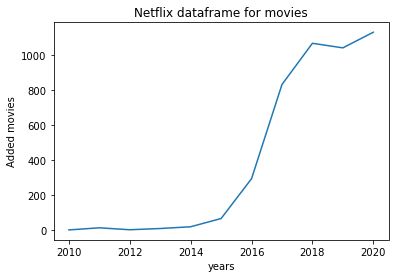

In [54]:
y = np.array(filtered_dataframe["added moives"]).flatten()
y.reshape(1,-1)
plt.plot(X.flatten(),y)
plt.xlabel("years")
plt.ylabel("Added movies")
plt.title("Netflix dataframe for movies")

Text(0.5, 1.0, 'Netflix dataframe for TV Shows')

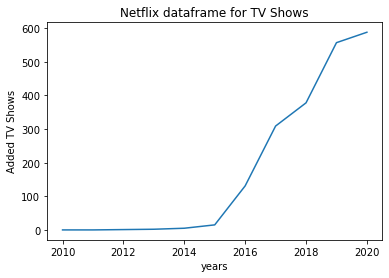

In [55]:
y = np.array(filtered_dataframe["added TV shows"]).flatten()
plt.plot(X.flatten(),y)
plt.xlabel("years")
plt.ylabel("Added TV Shows")
plt.title("Netflix dataframe for TV Shows")

In [56]:
# Splitting data into training/testing
from sklearn.model_selection import train_test_split

# Split into training/testing sets
# 75% is training and 25% is testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25,
                                                    random_state=123)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [61]:
reg = LinearRegression()
X = np.array([
    [2015],
    [2016],
    [2017],
    [2018],
    [2019],
    [2020],
])
X_predict = np.array([[2021]])
y = np.array(filtered_dataframe["added moives"][filtered_dataframe["year"]>2014]).flatten()
y.reshape(1,-1)
reg = reg.fit(X,y)
predict = reg.predict(X_predict)
print("The prediction for number of movies could is added : ", int(predict))
print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

The prediction for number of movies could is added :  1515
Coefficients: [222.37142857]
Intercept: -447897.5238095239


In [62]:
from sklearn import metrics
import math

y_pred = reg.predict(X_test)

print('Test MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('Test MSE:',metrics.mean_squared_error(y_test, y_pred))

Test MAE: 381.10793650796404
Test MSE: 298785.29224492447


In [63]:
y = np.array(filtered_dataframe["added TV shows"][filtered_dataframe["year"]>2014]).flatten()
y.reshape(1,-1)
reg = reg.fit(X,y)
predict = reg.predict(X_predict)
print("The prediction for number of TV Shows could is added : ", int(predict))
print('Coefficients:', reg.coef_)
print('Intercept:', reg.intercept_)

The prediction for number of TV Shows could is added :  750
Coefficients: [120.34285714]
Intercept: -242462.04761904766


In [64]:
from sklearn import metrics
y_pred = reg.predict(X_test)

print('Test MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('Test MSE:',metrics.mean_squared_error(y_test, y_pred))

Test MAE: 227.74920634921486
Test MSE: 112576.41786849352
